# 1. Implementation of k-mean clustering analysis using Python numpy library

- With the uploaded dataset, implementing and performing k-mean clustering analysis using Python numpy library


# 2. Abstract of the Project

- The goal is to find clusters such that the observations within each cluster are quite similar to each other, while observations in different clusters are quite different from each other.
- Being a clustering algorithm, k-Means takes data points as input and groups them into k clusters. This process of grouping is the training phase of the learning algorithm. 
- The result would be a model that takes a data sample as input and returns the cluster that the new data point belongs to, according the training that the model went through. 
    - Basic data analysis is performed as a Smoke test for the quality of data, to handle null values or non-categorical datatypes for our use case.
    - Given data is divided into training data and test data.
    - Using k-means algorithm, model is trained with the training set of the input data.
    - Optimization techniques like Elbow rule, Silhouette coefficient are used to find the optimal k value.
    - Finally the prediciton level of the model is found out using the test data with optimal clusters.

# 3. Theory

- Unsupervised learning is where you only have input data (X) and no corresponding output variables.

- The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

- These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is no teacher. Algorithms are left to their own devises to discover and present the interesting structure in the data.

- Unsupervised learning problems can be further grouped into clustering and association problems.

    - Clustering: A clustering problem is where you want to discover the inherent groupings in the data, such as grouping             customers by purchasing behavior.
    - Association:  An association rule learning problem is where you want to discover rules that describe large portions of           your data, such as people that buy X also tend to buy Y.
    
- Some popular examples of unsupervised learning algorithms are:

    - k-means for clustering problems.
    - Apriori algorithm for association rule learning problems.
    
- Clustering is a form of unsupervised learning because we’re simply attempting to find structure within a dataset rather than predicting the value of some response variable.
- the process of performing k-means is simple.


                          Assign initial values for each u (from u=1 till u=k);
                          Repeat {
                                   Assign each point in the input data to the u that is closest to it in value;
                          Calculate the new mean for each u;
                          if all u values are unchanged { break out of loop; }
                                  }
                                  
                                  
- First, we initialize k points, called means, randomly.
- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items           categorized in that mean so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

# K-means value optimization

- Using Elbow rule and Silhouette coefficient


# Importing required packages for the project

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data into pandas dataframe

In [9]:
data = pd.read_csv("C:\\Users\\Hello\\Downloads\\DSCI6001_prj2_data.csv")

# Data snapshot using head()

In [10]:
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# List of columns from the dataset

In [11]:
data.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

# Shape of the given dataset

In [12]:
data.shape

(178, 13)

# Data testing to check if any null values

In [13]:
data.isnull().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

# Analysing data before clustering

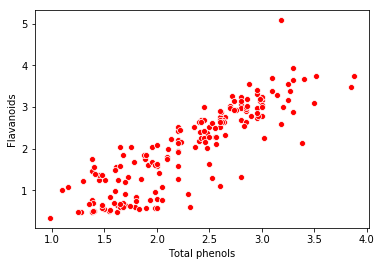

In [17]:
sns.scatterplot(x=data['Total phenols'],y=data['Flavanoids'],color='red')

# Exploring correlation between all the features of the data at hand

In [19]:
heatmap = data.corr()

In [20]:
heatmap

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


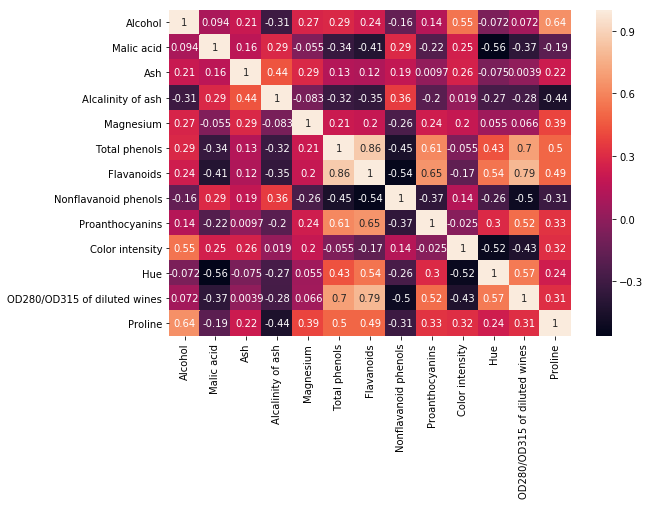

In [21]:
import seaborn as sns
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heatmap,annot=True)

# Observations from the above heatmap
    - Plotting the correlation between all the given features, Total Phenols and Flavanoids have the strongest(0.86) positive correlation.
    - Making these two as the main features to cluster the whole datapoints.

# Performing K-Means clustering with random k-value as 3

In [132]:
class K_Means:
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 200):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

    def fit(self, data):

        self.centroids = {}
        #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]

        #begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

        #find the distance between the point and cluster; choose the nearest centroid
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)
            previous = dict(self.centroids)
           
            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
            isOptimal = True
            
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
                #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break

    def pred(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
#print(classification)


# Visualising using scatter plot for the features along with the clusters and their centroids

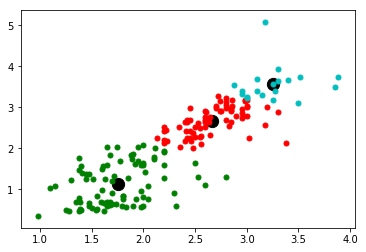

In [125]:
def main():

    df = pd.read_csv("C:\\Users\\Hello\\Downloads\\DSCI6001_prj2_data.csv")
    df = df[['Total phenols', 'Flavanoids']]
    dataset = df.astype(float).values.tolist()

    X = df.values #returns a numpy array

    km = K_Means(3)
    km.fit(X)

    # Plotting starts here
    colors = 10*["r", "g", "c", "b", "k"]

    for centroid in km.centroids:
        plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 150, marker = "o",c="black")

    for classification in km.classes:
        color = colors[classification]
        for features in km.classes[classification]:
            plt.scatter(features[0], features[1], color = color,s = 25)

    plt.show()
if __name__ == "__main__":
    main()


# Elbow method to find optimal k value

In [42]:
within_cluster_ss = []
for x in range(1,10):
    np.random.seed(420)
    dist = dist0 = dist1 = dist2 = 0
    centroids = data.sample(n=x)
    Mean_diff = 1
    j=0

    while(Mean_diff!=0):
        i=1
        for index1,row_c in centroids.iterrows():
            Euclidean_dist=[]
            for index2,row_d in data.iterrows():
                dist1=(row_c["Flavanoids"]-row_d["Flavanoids"])**2
                dist2=(row_c["Total phenols"]-row_d["Total phenols"])**2
                dist0=np.sqrt(dist1+dist2)
                Euclidean_dist.append(dist0)
            data[i]=Euclidean_dist
            i=i+1
    
   
        Cluster=[]
        for index,row in data.iterrows():
            min_dist=row[1]
            pos=1
            for i in range(x):
                if row[i+1] < min_dist:
                    min_dist = row[i+1]
                    pos=i+1
            Cluster.append(pos)
        data["Cluster"]=Cluster
    
        centroids_new = data.groupby(["Cluster"]).mean()[["Total phenols","Flavanoids"]]
    
        if j == 0:
            diff=1
            j=j+1
        else:
            Mean_diff = (centroids_new['Total phenols'] - centroids['Total phenols']).sum() + (centroids_new['Flavanoids'] - centroids['Flavanoids']).sum()
        centroids = data.groupby(["Cluster"]).mean()[["Total phenols","Flavanoids"]]
  
    # to find within cluster sum of squares
    for m in range(x):
        data1 =data[data["Cluster"]==m+1]
        dist3=dist4=dist5=dist6=0
        for index1,row_c in centroids.iterrows():
            if index1 == m+1:
                for index2,row_d in data1.iterrows():
                    dist3=(row_c["Flavanoids"]-row_d["Flavanoids"])**2
                    dist4=(row_c["Total phenols"]-row_d["Total phenols"])**2
                    dist5= dist3 + dist4
                    dist6= dist6 + dist5
        dist = dist + dist6 
    within_cluster_ss.append(dist)    
    print("The Within cluster sum of squares for {} and the cluster is {}".format(x,dist))

The Within cluster sum of squares for 1 and the cluster is 245.92525280898883
The Within cluster sum of squares for 2 and the cluster is 67.47656579380138
The Within cluster sum of squares for 3 and the cluster is 42.078666444746915
The Within cluster sum of squares for 4 and the cluster is 29.5078142340347
The Within cluster sum of squares for 5 and the cluster is 23.56288428711123
The Within cluster sum of squares for 6 and the cluster is 22.35318659057554
The Within cluster sum of squares for 7 and the cluster is 18.650711121351765
The Within cluster sum of squares for 8 and the cluster is 17.45894518720291
The Within cluster sum of squares for 9 and the cluster is 15.121947976241415


# Plotting the graph to show the elbow point which decides the optimal k value

Text(0,0.5,'within cluster sum of squares')

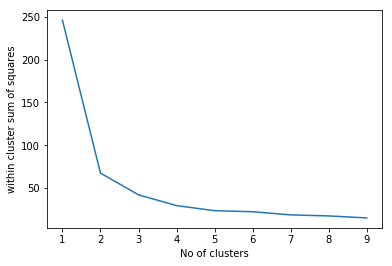

In [45]:
plt.plot(range(1,10),within_cluster_ss)
plt.xlabel('No of clusters')
plt.ylabel('within cluster sum of squares')

# With looking at the above elbow rule for K-Means, optimal value for k is 3.
    - Cluster 3 is showing the min difference in the mean

# Conclusion

- For the given dataset with 13 features, we have found the correlation matrix and two features have shown high posive correlation-Total phenols and Flavanoids(0.86)
- Taking into consideration these two features, we have assumed the random k value as 3 and ran the k means algorithm for these two features which closely represent the entire dataset.
- The scatter plot shows the closely formed clusters with three centroids.
- We then used the optimatization technique, the elbow rule, to find the optimal k value for the given dataset, which gave us the value of k=3.
- Hence, for the given dataset, optimal way is to classify them into three clusters which group them according to their similarities.